In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

Importing the datasets

In [2]:
train = pd.read_csv('data/Train (1).csv')
test = pd.read_csv('data/Test (1).csv')
submit = pd.read_csv('data/SampleSubmission.csv')


In [3]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
train.shape

(56000, 52)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [6]:
train.select_dtypes(include=['object']).head()

,Applicant_ID,form_field47,default_status
0,Apcnt_1000000,charge,no
1,Apcnt_1000004,charge,no
2,Apcnt_1000008,charge,yes
3,Apcnt_1000012,charge,no
4,Apcnt_1000016,charge,no


In [7]:
train['form_field47'].value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [8]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


Defining Function to replace missing values

In [9]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the columns
    mis_val_table_rem_columns = mis_val_table.rename(columns= {0 : "Missing values", 1 : "% of Total Values" })
    
    # sorting out the table by % of the missing values
    mis_val_table_rem_columns = mis_val_table_rem_columns[
        mis_val_table_rem_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print the summary
    print('Your selected Dataframe has' +  str(df.shape[1]) + "columns. \n There are " + str(mis_val_table_rem_columns.shape[0])+ "columns that have missing values.")
                                                                                               
    # Return the dataframe with the missing information
    return mis_val_table_rem_columns

In [10]:
missing_value_table(train).head(50)

Your selected Dataframe has52columns. 
 There are 48columns that have missing values.


,Missing values,% of Total Values
form_field40,43729,78.1
form_field31,39408,70.4
form_field41,38229,68.3
form_field11,31421,56.1
form_field45,31317,55.9
form_field23,28123,50.2
form_field30,25509,45.6
form_field35,23148,41.3
form_field15,22475,40.1
form_field48,20889,37.3


Dealing And Replacing the missing Values

In [11]:
train.fillna(train.mean(), inplace=True)
missing_value_table(train)

Your selected Dataframe has52columns. 
 There are 0columns that have missing values.


,Missing values,% of Total Values


EDA

In [12]:
train['default_status'] = train['default_status'].map({'yes': 1, 'no': 0})
train['form_field47'] = train['form_field47'].map({'charge': 1, 'lending': 0})

Text(0.5, 1.0, 'Default Distribution')

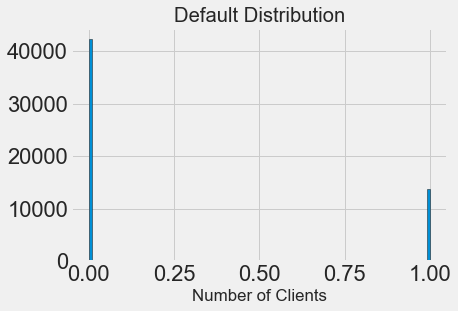

In [13]:
# Single Variable Plot

figsize = (8,8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(train['default_status'], bins = 100, edgecolor = 'k')
plt.xlabel('Number of Clients')
plt.title('Default Distribution')

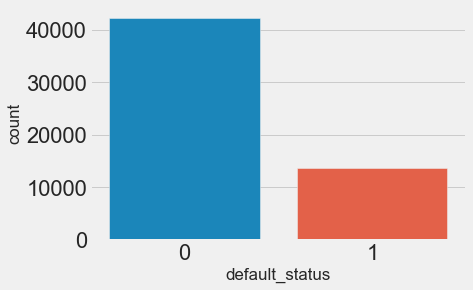

In [14]:
sns.countplot(train['default_status'])

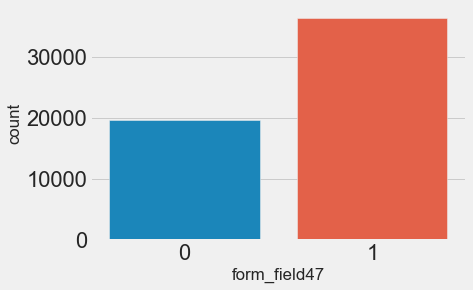

In [15]:
sns.countplot(train['form_field47'])

Correlation Distribution

In [16]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFlitered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr != 1.000)]
    xFlattend = xFlitered.unstack().sort_values().drop_duplicates()
    return xFlattend

correlation_data = train.corr()['default_status'].sort_values()

correlation_data.tail(30)

form_field50     -0.042553
form_field12     -0.036329
form_field14      0.008272
form_field11      0.025148
form_field24      0.051708
form_field41      0.065411
form_field45      0.082822
form_field40      0.084540
form_field5       0.088647
form_field20      0.127232
form_field19      0.134428
form_field39      0.137158
form_field4       0.147109
form_field34      0.150659
form_field38      0.151514
form_field49      0.151953
form_field46      0.161150
form_field36      0.164881
form_field35      0.191742
form_field3       0.193026
form_field23      0.218340
form_field2       0.220923
form_field16      0.222870
form_field18      0.223017
form_field17      0.223948
form_field47      0.227926
form_field22      0.245924
form_field21      0.257253
form_field42      0.324817
default_status    1.000000
Name: default_status, dtype: float64

Feature Engineering and Selection

In [17]:
def remove_collinear_features(x, threshold):
    """
        This is to remove collinear featires in the dataset ith a correlation and coefficent greater than the specified threshold, removing this features can help to generalize and increase the 
        interpreabitily of the model
        The input will be the threshold, that is any features with corelation greater than the threshold wil be removed
        Output will be a dataframe that contains only the non-highly collinear features
    """
    
    # Ensuring that the corelation within the default_status isnt removed
    y = x['default_status']
    x = x.drop(columns = ['default_status'])
    
    # Calculating the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Itertrating through the correlation matirx and compare the corelations
    for i in iters:
        for j in range(1):
            item = corr_matrix.iloc[j: (j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # if corelation exceeds the threshld
            if val >= threshold:
                # print the correlated values and features 
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))

                drop_cols.append(col.values[0])
            
            # drop one of each pair of corelated columns
            drops = set(drop_cols)
            x = x.drop(columns = drops)
            
            # Add the score back into the data
            x['loss'] = y
            
            return x

In [18]:
# Remove the collinear features above a specifed correlation coffeiceint
train_corr_data = remove_collinear_features(train, 0.1)
train_corr_data.shape

(56000, 51)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features = train.drop(columns=['default_status'])
target = train['default_status']
print(features.shape, target.shape)

(56000, 51) (56000,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=101)

X_train_id = X_train['Applicant_ID']
X_train.drop(columns=['Applicant_ID'], inplace=True)
X_test_id = X_test['Applicant_ID']
X_test.drop(columns=['Applicant_ID'], inplace=True)
X_val_id = X_val['Applicant_ID']
X_val.drop(columns=['Applicant_ID'], inplace=True)

X_train = np.array(X_train)
sc.fit_transform(X_train)
X_test = np.array(X_test)
sc.transform(X_test)
X_val = np.array(X_val)
sc.transform(X_val)

y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))
y_val = np.array(y_val).reshape((-1, ))


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(39200, 50) (15120, 50)
(39200,) (15120,)
(39200, 50) (15120, 50) (1680, 50)
(39200,) (15120,) (1680,)


Models To Evaluate

In [21]:
test_id = test['Applicant_ID']
test.drop(columns=['Applicant_ID'], inplace=True)
test['form_field47'] = test['form_field47'].map({'charge': 1, 'lending': 0})

test.fillna(test.mean(), inplace=True)
test = np.array(test)
test = sc.transform(test)

In [22]:
# Function for evaluating the model 
def cross_val(X_train, y_train, model):
    # for the k-fold validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=model, X = X_train, y = y_train, cv=5)
    return accuracies.mean()

# Taking a model aand training it, and evaluating the model on the test set
def fit_and_evalute(model):
    #Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # for the submisson
    submit_val = model.predict(test)
    
    # Return the performance meterics
    return model_cross, submit_val

In [23]:
# Training Using Navie Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evalute(naive)
print('Naive Bayes Performance on the test set: Cross Validation Score = ' +  str(naive_cross))

Naive Bayes Performance on the test set: Cross Validation Score = (0.4507908163265307, array([1, 1, 1, ..., 1, 1, 1], dtype=int64))


In [24]:
# Traning using Random Forest Classifaction
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators= 10, criterion= 'entropy')
random_cross = fit_and_evalute(random)
print('Random Forest Performance on the test set: Cross Validation Score = ' + str(random_cross))

Random Forest Performance on the test set: Cross Validation Score = (0.7900255102040816, array([0, 1, 0, ..., 1, 1, 1], dtype=int64))


In [25]:
# Using Gradient Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evalute(gb)
print('Random Forest Performance on the test set: Cross Validation Score = ' + str(gb_cross))

Random Forest Performance on the test set: Cross Validation Score = (0.8059438775510204, array([1, 1, 1, ..., 1, 1, 1], dtype=int64))


In [29]:
final_model = XGBClassifier()
final_model.fit(X_train, y_train)
predict = final_model.predict(test)

In [32]:
submit_data = {'Applicant_ID': test_id, 'default_status': predict}
sample_submit = pd.DataFrame(data=submit_data)

In [31]:
submit.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [33]:
sample_submit.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [52]:
sample_submit.to_csv('data/I.T_SampleSubmission2.csv', index=False)
sample_submit.shape

(24000, 2)

In [48]:
submit.shape

(24000, 2)

In [51]:
sample_submit

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1
5,Apcnt_1000084,1
6,Apcnt_1000104,1
7,Apcnt_1000116,1
8,Apcnt_1000128,1
9,Apcnt_1000156,1


In [50]:
submit

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1
5,Apcnt_1000084,1
6,Apcnt_1000104,1
7,Apcnt_1000116,1
8,Apcnt_1000128,1
9,Apcnt_1000156,1
